# Initial Data Exploration
### Note: The consumption data consists of smart electricity meter readings at 15-minute granularity, gas meter readings at hourly intervals and water meter readings at 15-minute intervals.

### 1) Data visualization

In [1]:
#Importing initial modules for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#First rows of building_consumption dataset
#Dataset contains information about the energy consumed in KW/h = 1.06 Kg of CO2
df = pd.read_csv("raw_data/building_consumption.csv")
df.head(5)

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.011
1,1,1,2019-03-29 01:30:00,0.021
2,1,1,2019-03-29 01:45:00,0.038
3,1,1,2019-03-29 02:00:00,0.871
4,1,1,2019-03-29 02:15:00,0.873


In [3]:
#Set timestamp as datetime and adding CO2 consumption column (Kg)
df['CO2_consumption'] = df['consumption']*1.06
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df.head(5)

,campus_id,meter_id,timestamp,consumption,CO2_consumption
0,1,1,2019-03-29 01:15:00,0.011,0.01166
1,1,1,2019-03-29 01:30:00,0.021,0.02226
2,1,1,2019-03-29 01:45:00,0.038,0.04028
3,1,1,2019-03-29 02:00:00,0.871,0.92326
4,1,1,2019-03-29 02:15:00,0.873,0.92538


In [4]:
#Set timestamp as index
df.set_index("timestamp", inplace = True)

In [5]:
#Filtering data by campus using a mask
df1 = df[df["campus_id"] == 1]
df2 = df[df["campus_id"] == 2]
df3 = df[df["campus_id"] == 3]

/tmp/ipykernel_11149/4046471156.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
/tmp/ipykernel_11149/4046471156.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
/tmp/ipykernel_11149/4046471156.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot3.set_xticklabels(plot3.get_xticklabels(), rotation=45)
/tmp/ipykernel_11149/4046471156.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/amypy/.pyenv/versions/3.10.6/envs/campus_emissions/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can b

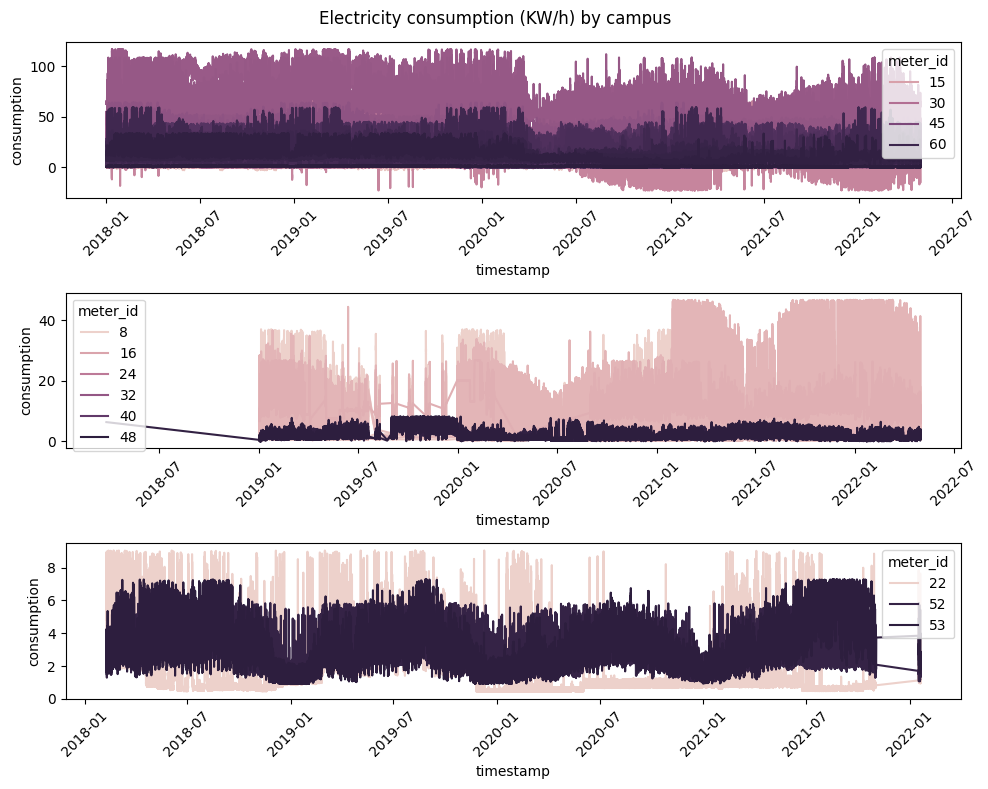

In [6]:
#Consumption data is divided by campus 
#Consumption recorded at each campus is widely different.
#In campus 1 there is a much wider range of consumption between meters, while in campus 3 the measurements are less dispersed.

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
fig.suptitle('Electricity consumption (KW/h) by campus')
axes = axes.flatten()

plot1 = sns.lineplot(x='timestamp', y='consumption', data=df1, hue='meter_id', ax=axes[0])
plot2 = sns.lineplot(x='timestamp', y='consumption', data=df2, hue='meter_id', ax=axes[1])
plot3 = sns.lineplot(x='timestamp', y='consumption', data=df3, hue='meter_id', ax=axes[2])

plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [7]:
#Identifying meters on campus 3
uniques = np.unique(df3["meter_id"])
print("# meters: ",uniques.size)
print("ids: ", uniques)

# meters:  3
ids:  [22 52 53]


<Axes: ylabel='consumption'>

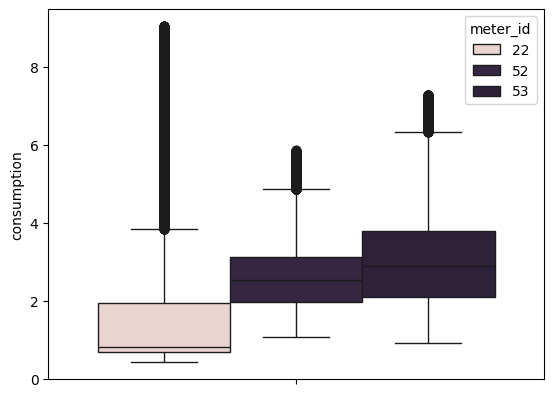

In [8]:
#Using a boxplot with all meters to check for dispersion
sns.boxplot(y = "consumption", data = df3, hue="meter_id")

### As data in campus 3 is less dispersed test is going to be run on campus 3

In [9]:
# Resampling it to day average
daily = df3.resample("D").mean()
daily.head(5)

,campus_id,meter_id,consumption,CO2_consumption
timestamp,,,,
2018-02-08,3.0,48.473684,3.102531,3.288683
2018-02-09,3.0,43.932584,3.207934,3.400410
2018-02-10,3.0,42.333333,2.551846,2.704957
2018-02-11,3.0,42.333333,2.451735,2.598839
2018-02-12,3.0,42.839858,3.118859,3.305990


In [10]:
#Export sample to excel 
daily.to_excel("test.xlsx")

In [11]:
#Check for missing data 
print("Nulls in data:\n",daily.isnull().sum())
print("\nNaN in data:\n",daily.isna().sum())

Nulls in data:
 campus_id          75
meter_id           75
consumption        75
CO2_consumption    75
dtype: int64

NaN in data:
 campus_id          75
meter_id           75
consumption        75
CO2_consumption    75
dtype: int64


We have 75 Days missing in data, but as seen below missing data are from 2021-11-03 onwards and they represent a little %
compared with the whole dataset. 

In [12]:
missing = daily[daily["consumption"].isnull()].index
print("Start date for missing data: ", missing.min())
print("End date for missing data: ", missing.max())
print("Total missing days: ", missing.max()-missing.min())#-1 to count start day
missing

Start date for missing data:  2021-11-03 00:00:00
End date for missing data:  2022-01-16 00:00:00
Total missing days:  74 days 00:00:00


DatetimeIndex(['2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
      

### Test are going to be runned on campus 3

In [13]:
#New dataset 
df = daily[daily["consumption"].notnull()]
#There are 4 elemnts not null before 2021-11-02, approach is to delete them
df = df.loc[df.index[:-4]]
df.head(5)

,campus_id,meter_id,consumption,CO2_consumption
timestamp,,,,
2018-02-08,3.0,48.473684,3.102531,3.288683
2018-02-09,3.0,43.932584,3.207934,3.400410
2018-02-10,3.0,42.333333,2.551846,2.704957
2018-02-11,3.0,42.333333,2.451735,2.598839
2018-02-12,3.0,42.839858,3.118859,3.305990


In [14]:
# Check if between start date to 2021-11-02 there is any missing data left
day_diff = (df.index.max() - df.index.min()).days
missing = day_diff - df.shape[0]
if missing < 1:
    print("OK, no missing info")
    print("min date: ", df.index.min())
    print("max date: ", df.index.max())

OK, no missing info
min date:  2018-02-08 00:00:00
max date:  2021-11-02 00:00:00


## Data complete. Starting ARIMA

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, shuffle = False)
test["naive_preds"] = train.iloc[-1,0]
baseline_mae = (test["consumption"] - test["naive_preds"]).abs().mean()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(train.isnull().sum())

campus_id          0
meter_id           0
consumption        0
CO2_consumption    0
dtype: int64


In [17]:
print(train.head())

            campus_id   meter_id  consumption  CO2_consumption
timestamp                                                     
2018-02-08        3.0  48.473684     3.102531         3.288683
2018-02-09        3.0  43.932584     3.207934         3.400410
2018-02-10        3.0  42.333333     2.551846         2.704957
2018-02-11        3.0  42.333333     2.451735         2.598839
2018-02-12        3.0  42.839858     3.118859         3.305990


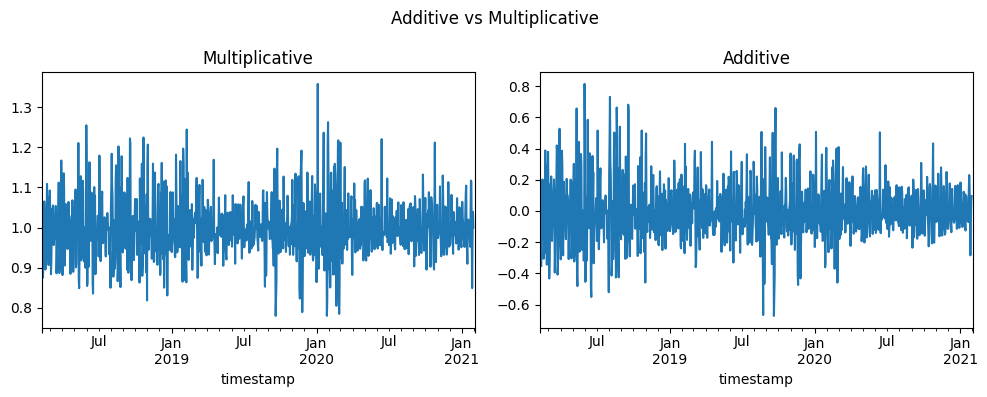

In [18]:
#Compare additive vs multiplicative
add = seasonal_decompose(train['consumption'], model='additive')
multi = seasonal_decompose(train['consumption'], model = "multiplicative")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Additive vs Multiplicative')
axes = axes.flatten()
multi.resid.plot(ax=axes[0]).set(title='Multiplicative')
add.resid.plot(ax=axes[1]).set(title='Additive')
plt.tight_layout()
plt.show()

In [19]:
train["seasonal_component"] = multi.seasonal
seasonal_one_year = train[["seasonal_component"]][:365]
seasonal_one_year["day"] = seasonal_one_year.index

In [20]:
seasonal_one_year

,seasonal_component,day
timestamp,,
2018-02-08,1.028067,2018-02-08
2018-02-09,0.998563,2018-02-09
2018-02-10,0.928956,2018-02-10
2018-02-11,0.956266,2018-02-11
2018-02-12,1.020182,2018-02-12
...,...,...
2019-02-03,0.956266,2019-02-03
2019-02-04,1.020182,2019-02-04
2019-02-05,1.029410,2019-02-05


In [21]:
train["seasonal_stripped"]  = train["consumption"] / multi.seasonal

<Axes: xlabel='timestamp'>

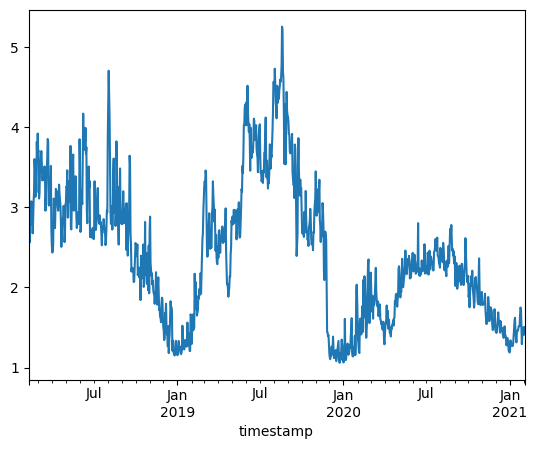

In [22]:
train["seasonal_stripped"].plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
diff_1_test = adfuller(train["seasonal_stripped"].diff().dropna())
print(diff_1_test)

(-13.940406401875128, 4.9035948111983963e-26, 9, 1080, {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}, -279.9741213971679)


In [25]:
#P D Q
result = adfuller(train["seasonal_stripped"].diff().dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
    print("\u001b[32mStationary\u001b[0m")
else:
    print("\x1b[31mNon-stationary\x1b[0m")

ADF Statistic: -13.940406
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Stationary


For the data to be stationary one diff is enough

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

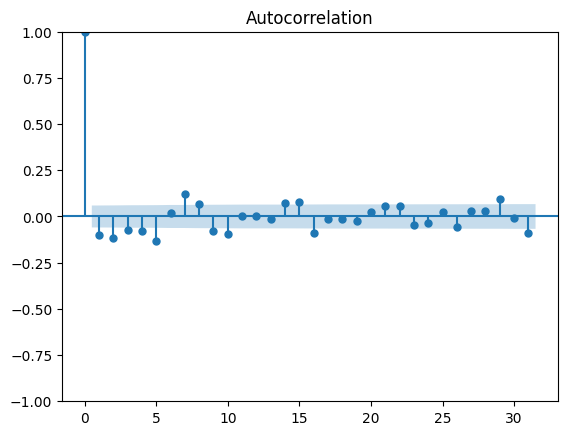

In [27]:
plot_acf(train["seasonal_stripped"].diff().dropna());

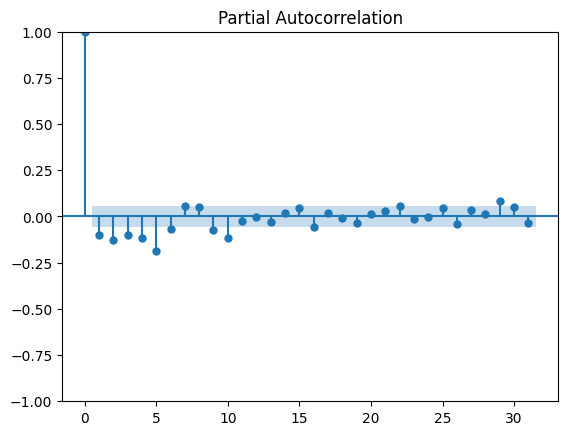

In [28]:
plot_pacf(train["seasonal_stripped"].diff().dropna());

d = 1 as one is the number of diff used to make it stationary

p = 1 lags where the PACF sharply drops to zero or becomes insignificant.

q = 1 lags where the ACF sharply drops to zero or becomes insignificant.

In [29]:
from statsmodels.tsa.arima.model import ARIMA

#model = ARIMA(train["seasonal_stripped"], order = (2,1,1))
arima = ARIMA(train["seasonal_stripped"], order=(1, 1, 1), trend='t')

arima = arima.fit()

arima.summary()

/home/amypy/.pyenv/versions/3.10.6/envs/campus_emissions/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/amypy/.pyenv/versions/3.10.6/envs/campus_emissions/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/amypy/.pyenv/versions/3.10.6/envs/campus_emissions/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      seasonal_stripped   No. Observations:                 1091
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 117.061
Date:                Wed, 10 Jan 2024   AIC                           -226.121
Time:                        13:01:00   BIC                           -206.146
Sample:                    02-08-2018   HQIC                          -218.561
                         - 02-02-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0014      0.003     -0.488      0.626      -0.007       0.004
ar.L1          0.6532      0.041     15.997      0.000       0.573       0.733
ma.L1         -0.8504      0.031    -27.764      0.000      -0.910      -0.790
sigma2         0.0472      0.001     34.537      0.000       0.045       0.050
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):               305.03
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.graphics.tsaplots import plot_predict

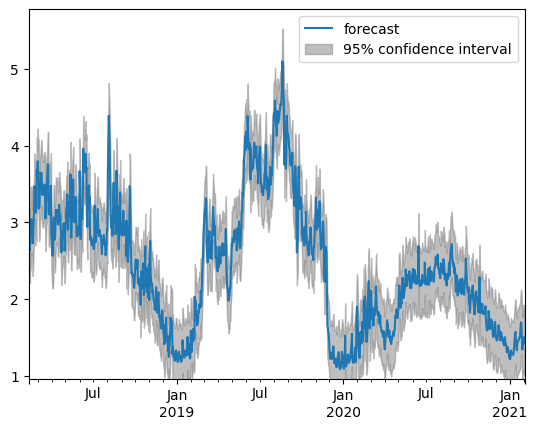

In [31]:
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.9 * train["seasonal_stripped"].min(), 1.1 * train["seasonal_stripped"].max()));

In [32]:
train

,campus_id,meter_id,consumption,CO2_consumption,seasonal_component,seasonal_stripped
timestamp,,,,,,
2018-02-08,3.0,48.473684,3.102531,3.288683,1.028067,3.017829
2018-02-09,3.0,43.932584,3.207934,3.400410,0.998563,3.212550
2018-02-10,3.0,42.333333,2.551846,2.704957,0.928956,2.747004
2018-02-11,3.0,42.333333,2.451735,2.598839,0.956266,2.563862
2018-02-12,3.0,42.839858,3.118859,3.305990,1.020182,3.057158
...,...,...,...,...,...,...
2021-01-29,3.0,42.197183,1.497209,1.587041,0.998563,1.499363
2021-01-30,3.0,42.333333,1.332969,1.412947,0.928956,1.434910
2021-01-31,3.0,42.333333,1.344873,1.425565,0.956266,1.406379


/tmp/ipykernel_11149/4135507809.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)


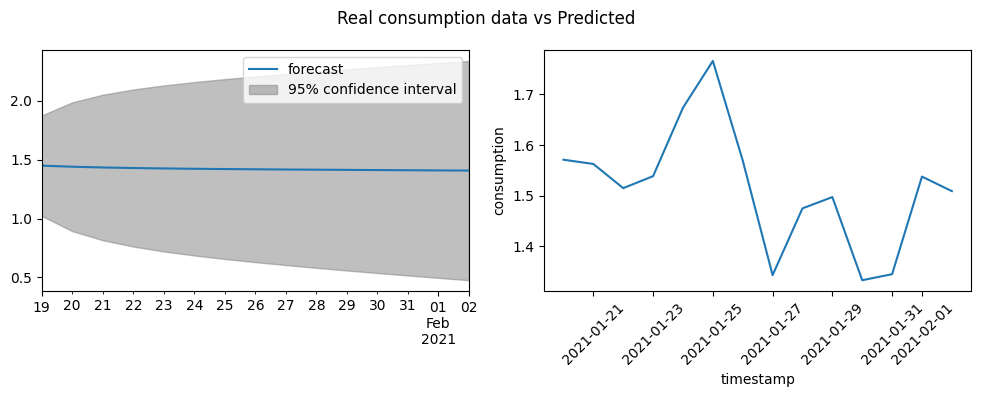

In [33]:
#Test - Last 15 values prediction vs real 15 values
start = pd.to_datetime("2021-01-19 00:00:00", format="%Y-%m-%d %H:%M:%S")
end = pd.to_datetime("2021-02-02 00:00:00", format="%Y-%m-%d %H:%M:%S")

#dataset between time range 
real_values = train[train.index < end]
real_values = train[train.index > start]

#Plot real consumption data vs predicted
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Real consumption data vs Predicted')

axes = axes.flatten()

plot_predict(arima, start=start, end=end, dynamic=True, ax=axes[0])
plot1 = sns.lineplot(x='timestamp', y='consumption', data=real_values, ax=axes[1])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [34]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(train["seasonal_stripped"], test = "adf", trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-229.289, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-158.557, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-167.029, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-170.842, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-160.513, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-228.267, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-228.715, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-225.203, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-228.026, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-184.039, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-226.901, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-227.964, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-240.093, Time=0.78 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-253.522, Time=1.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [35]:
auto_model.aic()

-257.7751362081874

## Out of sample predictions

In [70]:
preds, conf = auto_model.predict(len(test), return_conf_int = True)
preds_df = pd.DataFrame(preds)

In [51]:
preds_df["lower"] = conf[:, 0]
preds_df["upper"] = conf[:, 1]
preds_df.columns = ['preds', 'lower','upper'] 
preds_df.head(5)
print(len(preds_df))

(-6.0, 6.0)

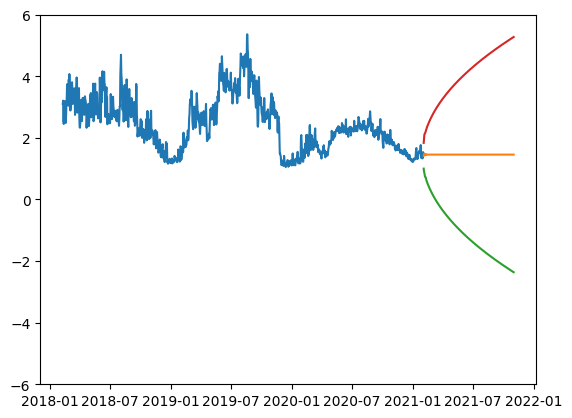

In [52]:
plt.plot(train["consumption"])
plt.plot(preds_df)
plt.ylim(-6, 6)

In [53]:
preds_df["day"] = preds_df.index
train["day"] = train.index

In [54]:
preds_df = pd.merge(preds_df,seasonal_one_year, on = "day", how = "left")

In [55]:
preds_df["full_preds"] = preds_df["preds"] * preds_df["seasonal_component"]
preds_df["lower_conf"] = preds_df["lower"] * preds_df["seasonal_component"]
preds_df["upper_conf"] = preds_df["upper"] * preds_df["seasonal_component"]

In [56]:
preds_df.set_index(test.index, inplace = True)

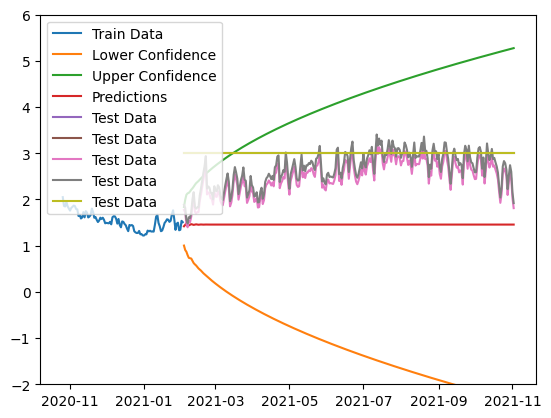

In [58]:
plt.plot(train["consumption"][-100:], label="Train Data")
plt.plot(preds_df["lower"], label="Lower Confidence")
plt.plot(preds_df["upper"], label="Upper Confidence")
plt.plot(preds_df["preds"], label="Predictions")
plt.plot(test, label="Test Data")
plt.legend()
plt.ylim(-2, 6)
plt.show()

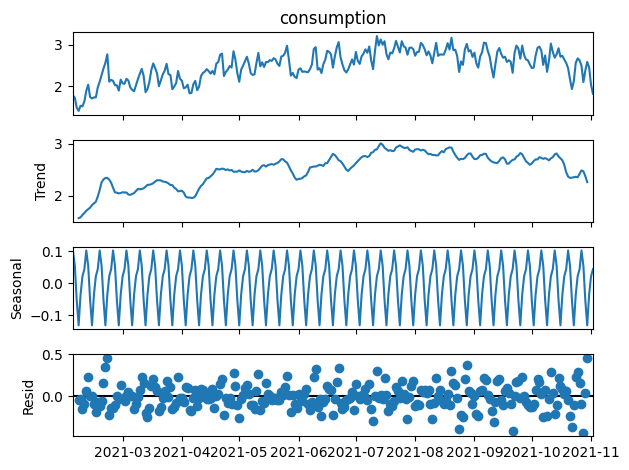

In [60]:
seasonal_decompose(test["consumption"]).plot();

In [63]:
model_mae = (test["consumption"] - preds_df["preds"]).mean()
print(model_mae)
print(baseline_mae)

1.045357430886375
0.5064449590632584


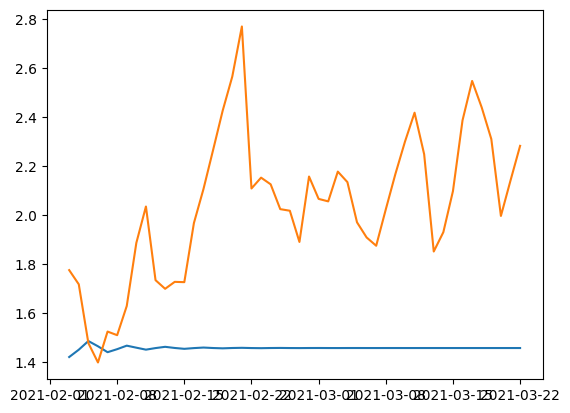

In [68]:
y_test = test['consumption']
predict_48 = auto_model.predict(n_periods=48)
plt.plot(predict_48, label='predict')
plt.plot(y_test[:48], label='real')

### ARIMA model is finished. Model is ok, needs to scale data. Will do later